# Chemometrics
<br>

In [2]:
options(repr.plot.width=3, repr.plot.height=3)

## about variables
 - independent variables (experimental, predictors) are those that we manipulate during an experiment
 - dependent variables are the one we try to explain

we test the effect of IV on DV. We study the effect of age (IV) and lecture skills (IV) on academic performances (marks, DV). The latter depend on the former. A high or low mark will *never* affect the lecture skills.

or as John Barns puts it:
"Let's review: In statistics, independent variables are causes and dependent variables are effects. For example, in a simple model of tampon purchases, we hypothesize that being a woman or a married man causes a purchase, so the variable "tampon purchases" is dependent on the independent variables "sex" and "marital status." (Reversing the dependent and independent variables would express the hypothesis that buying tampons makes single men become married women)."

<div class="comments">
It is important to know how many IV and DV we have, since it will guide us to pick the correct method.
</div>

<div class="ref" style="font-size:12px;">
https://statistics.laerd.com/statistical-guides/types-of-variable.php<br>
http://www.allanalytics.com/author.asp?section_id=1413&doc_id=252823
</div>


### categorical and continuous variables
 - Nominal (names: Colombia, Burkina Faso)
 - Dichotomous (male or female, the one usually exclude the other)
 - Ordinal (low, middle, high)
 - Continous variables
  - interval (0 C is not ratio)
  - ratio (0 K is a ratio, because it means no temperature at all)


### decision tree
<div class="col2">

<center>
<img src="./img/arbre.png" width="800">
</center>

- by knowing the kind and number of variables we can use such a decision tree to guide us among the many methods

It goes behond the scope of this classe to study all of them, but we will use the tree for the several example we want to study deeper in.
</div>

<div class="ref">
Ennos, R. 2007. Statistical and Data Handling Skills in Biology. Harlow, U.K., Pearson Education Limited
</div>

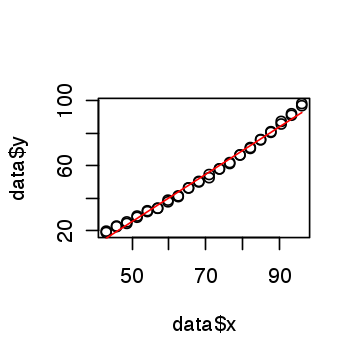

In [3]:
rm(list=ls(all=TRUE)) # we clear the variable space

N <- 20 # we define the number of observations

# we create a fake dataset using a quadratic
#equation and adding some noise
# first create a vector of x repeated rep times
rep <- 2 # number of replicates
X <- rep(seq(from=43, to=96, length.out=N),rep)
# then create the Y vector according to the equation:
Y <- (0.075 * X + -1.874 + 0.01* X^2)
# create some noise
noise <-runif(length(Y), -1, 1) 
# add some noise to Y
Y <- Y + 1*noise
x_sorted <- sort(X,index.return=TRUE)
x <-x_sorted$x
y <- Y[x_sorted$ix]
data <- data.frame(x=x, y=y, x2=x^2)
fit.lm = lm(y ~ x, data=data) 
plot(data$x,data$y); lines(data$x, fitted(fit.lm), col=2)


### Model evaluation

we now evaluate how good is our fit


In [5]:
Rep <- duplicated(data$x) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
# find out number of paramaeters
P <- length(fit.lm$coefficients) 
# find out the degree of freedom for our experiment
D <- N - P - R

S_replicate <- sum(((data$y[seq(from=1, to=20, by=2)] 
  + data$y[seq(from=2, to=20, by=2)]) / 2
  - data$y[seq(from=2, to=20, by=2)])^2*2)

S_residual <- sum ( resid(fit.lm)^2 )
# N-P degrees of freedom (# or S_total - S_predicted)

S_total <- sum( data$y^2 )
# N degrees of freedom
S_predicted <- sum( fitted(fit.lm)^2 ) 
S_lackOfFit <- S_residual - S_replicate
# N-P-R degrees of freedom

meanS_replicate <- S_replicate / R
meanS_residual <- S_residual / (N-P)
meanS_total <- S_total / N 
meanS_predicted <- S_predicted / P
meanS_lackOfFit <- S_lackOfFit / D

Fvalue <- meanS_lackOfFit / meanS_replicate

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %bash 
    ^


ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %python a=1
    ^
